In [ ]:
pip install tensorflow

In [1]:
#Installing all the necessary Libraries

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# **Data Loading and Preprocessing**

In [2]:
nsl_kdd_data = pd.read_csv('NSL-KDD/KDDTrain+.txt')

In [3]:
nsl_kdd_data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [19]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 
                'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
                'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome','level']

nsl_kdd_data = pd.read_csv('NSL-KDD/KDDTrain+.txt', names=column_names)



In [6]:
stats = nsl_kdd_data.describe()

# Apply Enhanced Styling
styled_stats = stats.style.background_gradient(cmap='viridis') \
                        .format("{:.2f}") \
                        .apply(lambda x: ["background: lightgreen" if v == x.max() else 
                                          "background: salmon" if v == x.min() else "" for v in x], axis=0) \
                        .set_properties(**{
                            'font-family': 'Segoe UI',
                            'border-color': 'black',
                            'border-width': '1px',
                            'border-style': 'solid'
                        })

# Display the styled DataFrame
styled_stats

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00
mean,287.14,45566.74,19779.11,0.00,0.02,0.00,0.20,0.00,0.40,0.28,0.00,0.00,0.30,0.01,0.00,0.00,0.00,0.00,0.01,84.11,27.74,0.28,0.28,0.12,0.12,0.66,0.06,0.10,182.15,115.65,0.52,0.08,0.15,0.03,0.28,0.28,0.12,0.12,19.50
std,2604.52,5870331.18,4021269.15,0.01,0.25,0.01,2.15,0.05,0.49,23.94,0.04,0.05,24.40,0.48,0.02,0.10,0.00,0.00,0.10,114.51,72.64,0.45,0.45,0.32,0.32,0.44,0.18,0.26,99.21,110.70,0.45,0.19,0.31,0.11,0.44,0.45,0.31,0.32,2.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,82.00,10.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00
50%,0.00,44.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,8.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255.00,63.00,0.51,0.02,0.00,0.00,0.00,0.00,0.00,0.00,20.00
75%,0.00,276.00,516.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,143.00,18.00,1.00,1.00,0.00,0.00,1.00,0.06,0.00,255.00,255.00,1.00,0.07,0.06,0.02,1.00,1.00,0.00,0.00,21.00
max,42908.00,1379963888.00,1309937401.00,1.00,3.00,3.00,77.00,5.00,1.00,7479.00,1.00,2.00,7468.00,43.00,2.00,9.00,0.00,1.00,1.00,511.00,511.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,255.00,255.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,21.00


In [7]:
nsl_kdd_data['outcome'] = np.where(nsl_kdd_data['outcome'] == 'normal', 'normal', 'attack')

print(nsl_kdd_data.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0      

In [8]:
print(nsl_kdd_data['outcome'].unique())
print(nsl_kdd_data['outcome'].value_counts())


['normal' 'attack']
outcome
normal    67343
attack    58630
Name: count, dtype: int64


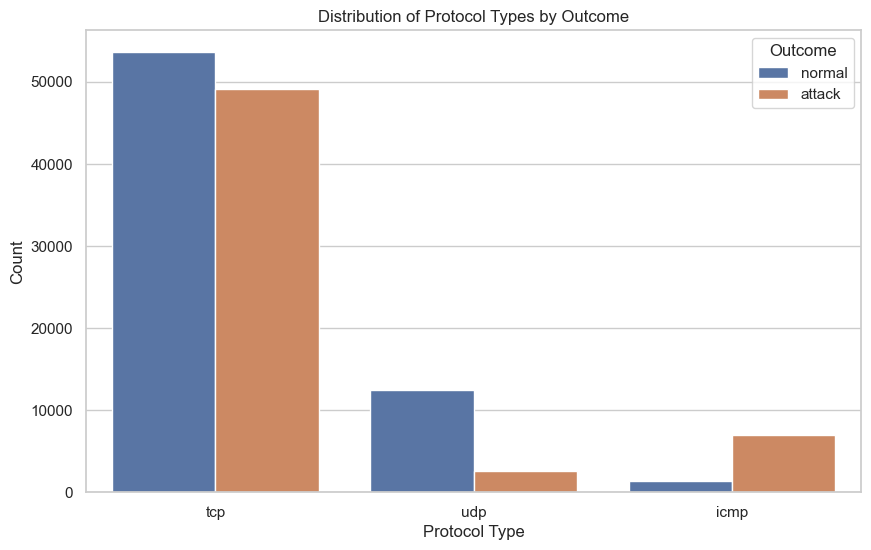

In [9]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot
sns.countplot(x='protocol_type', hue='outcome', data=nsl_kdd_data)

# Adding titles and labels for clarity
plt.title('Distribution of Protocol Types by Outcome')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.legend(title='Outcome')

# Show the plot
plt.show()

In [10]:
def preprocess_data(df, numerical_cols, categorical_cols, target_col):
    
    # Clone the dataset to avoid modifying the original
    df_processed = df.copy()

    
    scaler = RobustScaler()
    df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

    
    df_processed[target_col] = np.where(df_processed[target_col] == 'normal', 0, 1)

    
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols)

    return df_processed


cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
numerical_cols = [col for col in nsl_kdd_data.columns if col not in cat_cols + ['outcome']]
cat_cols_to_encode = ['protocol_type', 'service', 'flag']


preprocessed_data = preprocess_data(nsl_kdd_data, numerical_cols, cat_cols_to_encode, 'outcome')


# **Applying PCA**

In [11]:

X = preprocessed_data.drop('outcome', axis=1)
y = preprocessed_data['outcome']


n_components = 20  
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


print(f"Number of original features: {X.shape[1]}")
print(f"Number of reduced features: {X_pca.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Now x_train_pca, x_test_pca, y_train_pca, and y_test_pca are ready for use in model training and testing


Number of original features: 123
Number of reduced features: 20
Explained variance ratio: [8.70199318e-01 1.16834680e-01 1.29635507e-02 2.24196321e-06
 8.04914066e-08 4.48645689e-08 2.99718373e-08 2.05958471e-08
 1.03663265e-08 7.20429974e-09 6.72057291e-09 3.24479132e-09
 1.31501704e-09 9.89261725e-10 6.01536629e-10 4.47642303e-10
 3.29383948e-10 3.08212876e-10 2.81327324e-10 2.15866777e-10]


# **Evaluation function to check score metrics**

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_classification(model, model_name, X_train, y_train, X_test, y_test):
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

  
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    
    print(f"Results for {model_name}:")
    print(f"Training: Accuracy = {accuracy_train:.4f}, Precision = {precision_train:.4f}, Recall = {recall_train:.4f}, F1 Score = {f1_train:.4f}")
    print(f"Testing: Accuracy = {accuracy_test:.4f}, Precision = {precision_test:.4f}, Recall = {recall_test:.4f}, F1 Score = {f1_test:.4f}")

   
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix for {model_name}")

    if len(np.unique(y_test)) == 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"ROC AUC Score: {roc_auc:.4f}")

    plt.show()




# **Decision Tree Model**

Results for Decision Tree Classifier:
Training: Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Testing: Accuracy = 0.9981, Precision = 0.9977, Recall = 0.9983, F1 Score = 0.9980
ROC AUC Score: 0.9981


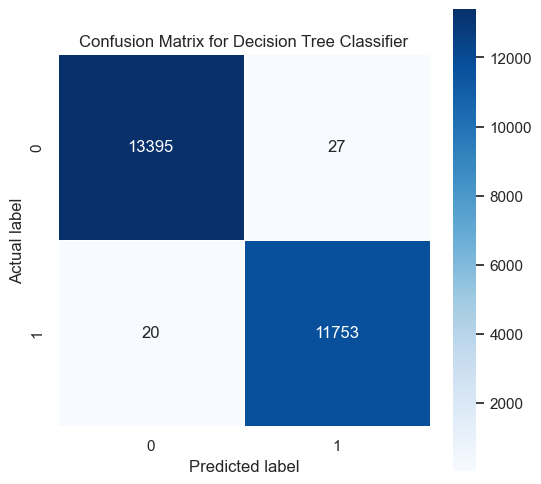

In [16]:
dt_classifier = DecisionTreeClassifier(random_state=42)  
dt_classifier.fit(x_train_pca, y_train_pca)


evaluate_classification(dt_classifier, "Decision Tree Classifier", x_train_pca, y_train_pca, x_test_pca, y_test_pca)

# **Random Forest Model**

Results for Random Forest Classifier:
Training: Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Testing: Accuracy = 0.9992, Precision = 0.9990, Recall = 0.9993, F1 Score = 0.9992
ROC AUC Score: 1.0000


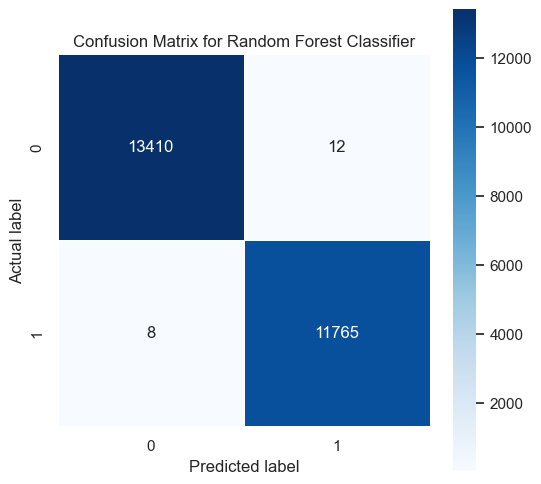

In [15]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_pca, y_train_pca)


evaluate_classification(rf_classifier, "Random Forest Classifier", x_train_pca, y_train_pca, x_test_pca, y_test_pca)

# **Support Vector Machine Model**

Results for SVM Model:
Training: Accuracy = 0.9804, Precision = 0.9709, Recall = 0.9874, F1 Score = 0.9791
Testing: Accuracy = 0.9807, Precision = 0.9711, Recall = 0.9881, F1 Score = 0.9795
ROC AUC Score: 0.9952


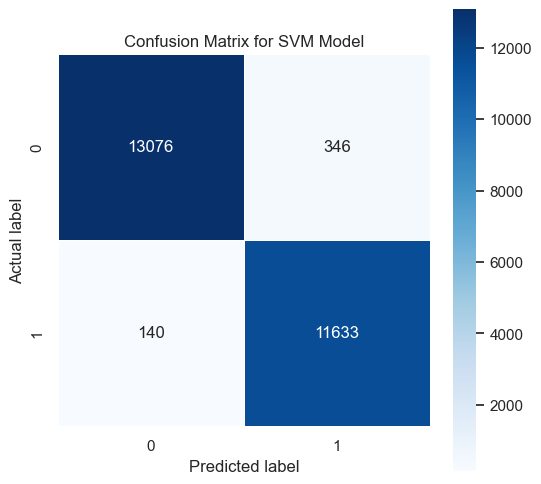

In [13]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))


svm_model.fit(x_train_pca, y_train_pca)


evaluate_classification(svm_model, "SVM Model", x_train_pca, y_train_pca, x_test_pca, y_test_pca)


# **Comparing The Models**

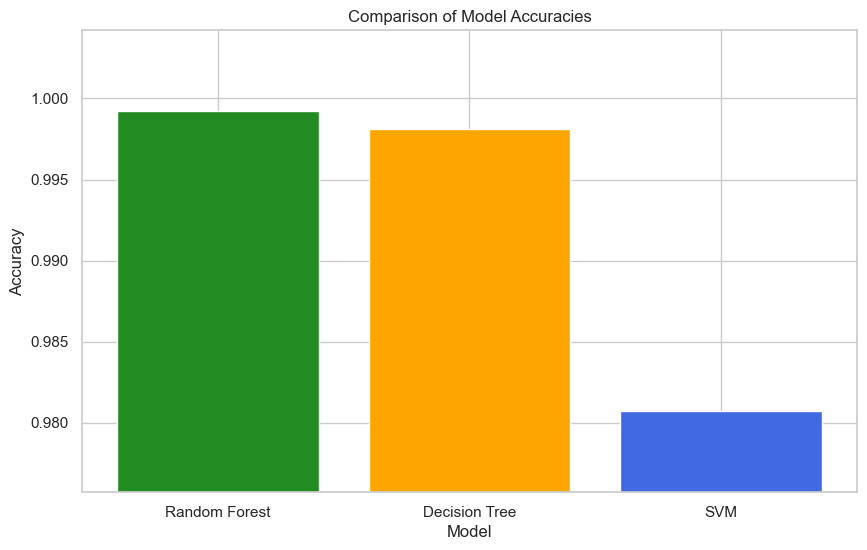

In [18]:

rf_accuracy = rf_classifier.score(x_test_pca, y_test_pca)
dt_accuracy = dt_classifier.score(x_test_pca, y_test_pca)
svm_accuracy = svm_model.score(x_test_pca, y_test_pca)

# Store accuracies in a dictionary
accuracies = {
    'Random Forest': rf_accuracy,
    'Decision Tree': dt_accuracy,
    'SVM': svm_accuracy
}


import matplotlib.pyplot as plt

# Find the minimum and maximum accuracy to set y-axis limits
min_accuracy = min(accuracies.values())
max_accuracy = max(accuracies.values())

# Set a margin for clarity
margin = 0.005  #


plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['forestgreen', 'orange', 'royalblue'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Set the y-axis limits to zoom in on the differences
plt.ylim([min_accuracy - margin, max_accuracy + margin])
plt.show()



# **Deep Learning : ANN Model**

In [21]:

model = Sequential([
    
    Dense(units=64, activation='relu', input_shape=(x_train_pca.shape[1],),
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=regularizers.l2(1e-4),
          activity_regularizer=regularizers.l2(1e-5)),
    Dropout(0.3), 

   
    Dense(units=128, activation='relu',
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=regularizers.l2(1e-4),
          activity_regularizer=regularizers.l2(1e-5)),
    Dropout(0.3),

    
    Dense(units=128, activation='relu', 
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
          bias_regularizer=regularizers.l2(1e-4),
          activity_regularizer=regularizers.l2(1e-5)),
    Dropout(0.3),

    
    Dense(units=1, activation='sigmoid')
])


model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


history = model.fit(x_train_pca, y_train_pca, epochs=10, batch_size=32, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(x_test_pca, y_test_pca)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_pred = model.predict(x_test_pca)






Epoch 1/10

2520/2520 [==============================] - 12s 4ms/step - loss: 890.5710 - accuracy: 0.7161 - val_loss: 1470.7686 - val_accuracy: 0.9630
Epoch 2/10
2520/2520 [==============================] - 9s 4ms/step - loss: 329.9432 - accuracy: 0.9344 - val_loss: 585.1816 - val_accuracy: 0.9737
Epoch 3/10
2520/2520 [==============================] - 8s 3ms/step - loss: 102.5221 - accuracy: 0.9538 - val_loss: 268.7064 - val_accuracy: 0.9783
Epoch 4/10
2520/2520 [==============================] - 8s 3ms/step - loss: 27.6384 - accuracy: 0.9629 - val_loss: 83.3582 - val_accuracy: 0.9749
Epoch 5/10
2520/2520 [==============================] - 8s 3ms/step - loss: 5.3782 - accuracy: 0.9651 - val_loss: 31.1990 - val_accuracy: 0.9785
Epoch 6/10
2520/2520 [==============================] - 8s 3ms/step - loss: 0.8626 - accuracy: 0.9686 - val_loss: 13.8235 - val_accuracy: 0.9810
Epoch 7/10
2520/2520 [==============================] - 8s 3ms/step - loss: 1.4827 - accuracy: 0.9685 - val_loss: 

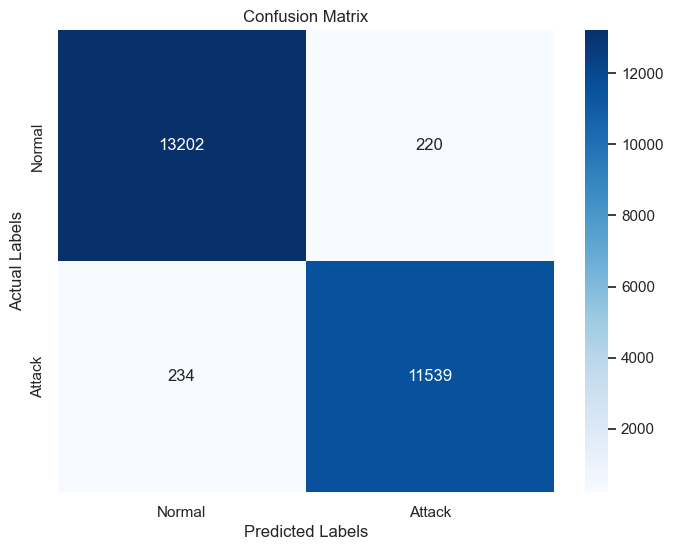

In [22]:
y_pred_labels = (y_pred > 0.5).astype(int)  


cm = confusion_matrix(y_test_pca, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()